<a href="https://colab.research.google.com/github/osalgador/BOOTSTRAP/blob/main/ProyectoMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Carga y preparación de datos
# Cargar dataset

file_path = '/content/drive/MyDrive/MS/BDpobreza.csv'
pobreza = None # Inicializamos pobreza a None

# Intentar con diferentes codificaciones
encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for encoding in encodings_to_try:
    try:
        print(f"Intentando leer el archivo con codificación: {encoding}...")
        pobreza = pd.read_csv(file_path, encoding=encoding)
        print(f"¡Éxito! Archivo '{file_path}' leído con codificación '{encoding}'.")
        break # Si la lectura es exitosa, salimos del bucle
    except UnicodeDecodeError:
        print(f"Falló con '{encoding}'. Intentando la siguiente...")
    except FileNotFoundError:
        print(f"Error: El archivo no se encontró en la ruta '{file_path}'. Verifica la ruta.")
        break # Salir si el archivo no existe
    except Exception as e:
        print(f"Ocurrió un error inesperado al leer con '{encoding}': {e}")
        # Puedes decidir si quieres continuar intentando o parar aquí
        # For now, let's continue to the next encoding if it's not a decoding error

if pobreza is not None:
    print("\nPrimeras 5 filas del DataFrame:")
    print(pobreza.head())
    print("\nInformación del DataFrame:")
    pobreza.info()
else:
    print("\nNo se pudo leer el archivo CSV con ninguna de las codificaciones intentadas.")
    print("Por favor, verifica la codificación de tu archivo usando un editor de texto (como Notepad++, VS Code) o una herramienta de línea de comandos como 'file -i'.")

# Eliminar filas con valores faltantes
    pobreza.isna().sum()
pobreza = pobreza.dropna()
pobreza= pobreza.drop(columns=[' % pob con ingreso menor CB '])

Intentando leer el archivo con codificación: utf-8...
Falló con 'utf-8'. Intentando la siguiente...
Intentando leer el archivo con codificación: latin-1...
¡Éxito! Archivo '/content/drive/MyDrive/MS/BDpobreza.csv' leído con codificación 'latin-1'.

Primeras 5 filas del DataFrame:
   Año    Trimestre    % pob pobreza laboral Nacional   % pob laboral EDOMEX   \
0   2005            1                             38.1                   34.0   
1   2005            2                             38.8                   35.2   
2   2005            3                             38.1                   32.5   
3   2005            4                             36.6                   32.1   
4   2006            1                             36.2                   30.2   

   % pob con ingreso menor CB   Tasa desocupacion    \
0                         38.1                  3.8   
1                         38.8                  3.5   
2                         38.1                  3.8   
3           

In [4]:
# Verificar si existen valores NAs o nulos
import pandas as pd
pobreza.isna().sum()

,0
Año,0
Trimestre,0
% pob pobreza laboral Nacional,0
% pob laboral EDOMEX,0
Tasa desocupacion,0
Asistencia escolar (5-17 años),0
Tasa ocupacion,0
Ingreso Laboral,0
IL deflactado Canasta basica,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



# Seleccionar variables numéricas
numerical_vars = pobreza.select_dtypes(include=['float64', 'int64'])


# Estadísticas de resumen
print(numerical_vars.describe().to_markdown(numalign="left", stralign="left"))


|       |  Año     |  Trimestre     |  % pob pobreza laboral Nacional    |  % pob laboral EDOMEX    |  Tasa desocupacion     |  Asistencia escolar (5-17 años)    |  Tasa ocupacion     |  Ingreso Laboral    |  IL deflactado Canasta basica    |
|:------|:---------|:---------------|:-----------------------------------|:-------------------------|:-----------------------|:-----------------------------------|:--------------------|:--------------------|:---------------------------------|
| count | 80       | 80             | 80                                 | 80                       | 80                     | 80                                 | 80                  | 80                  | 80                               |
| mean  | 2014.5   | 2.5            | 39.7725                            | 36.1425                  | 4.03375                | 91.5175                            | 15.2788             | 2266.28             | 2792.97                          |
| std   | 5.80266  | 1.12509

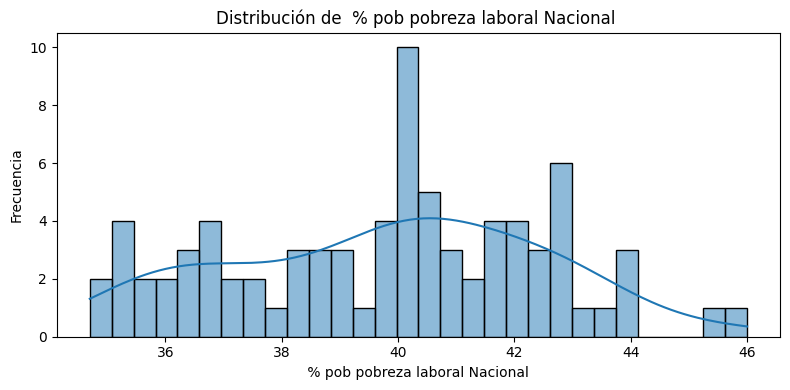

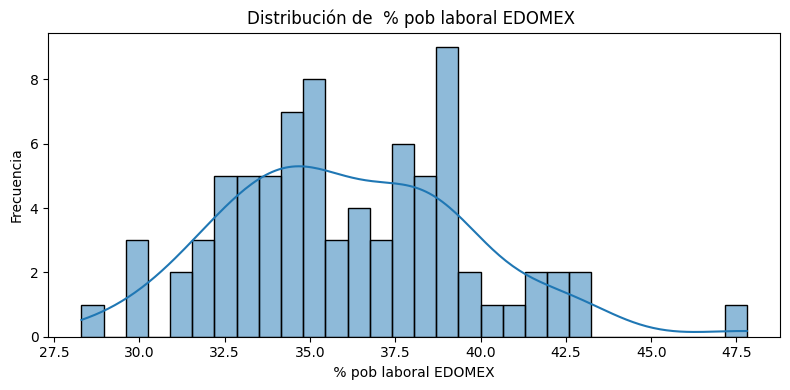

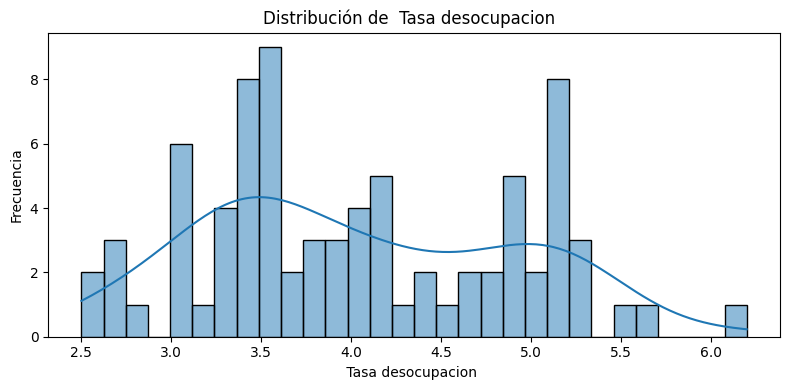

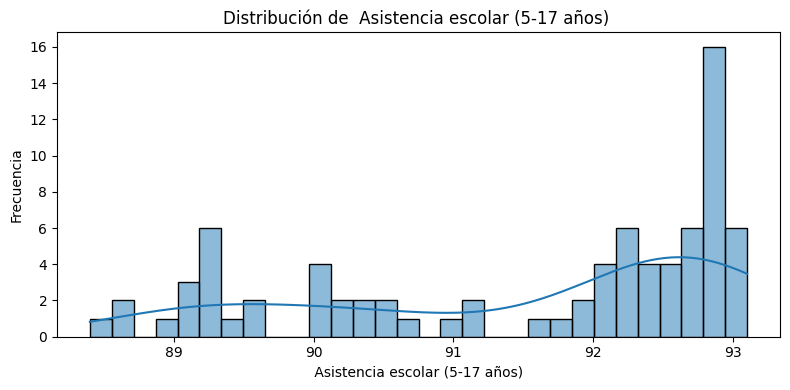

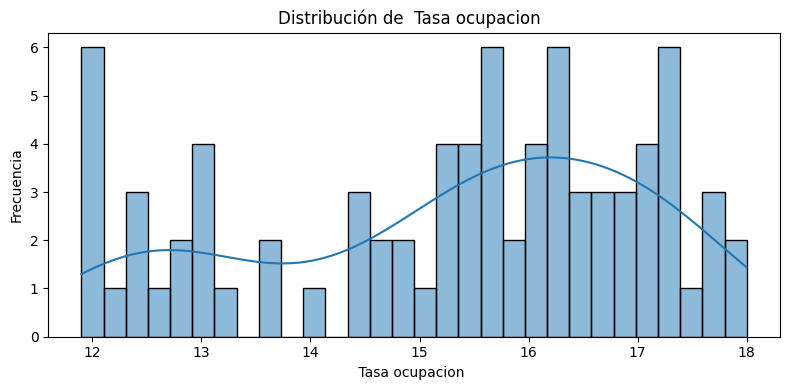

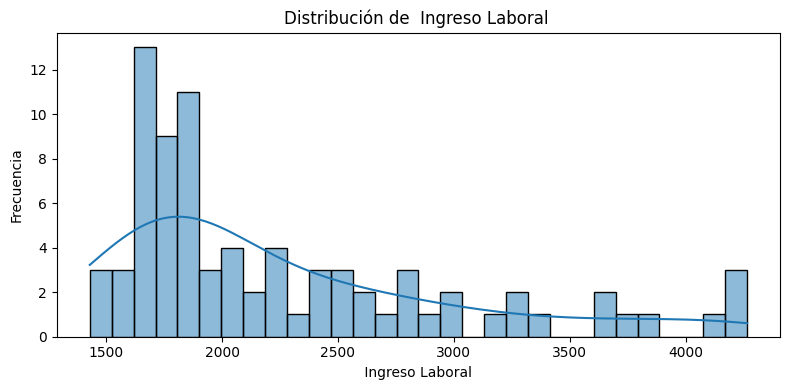

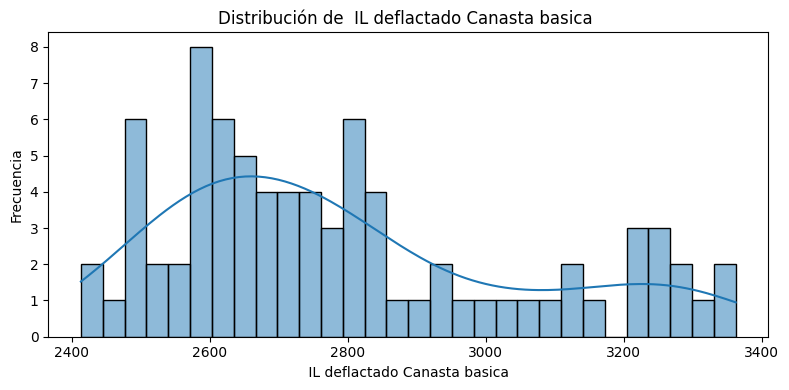

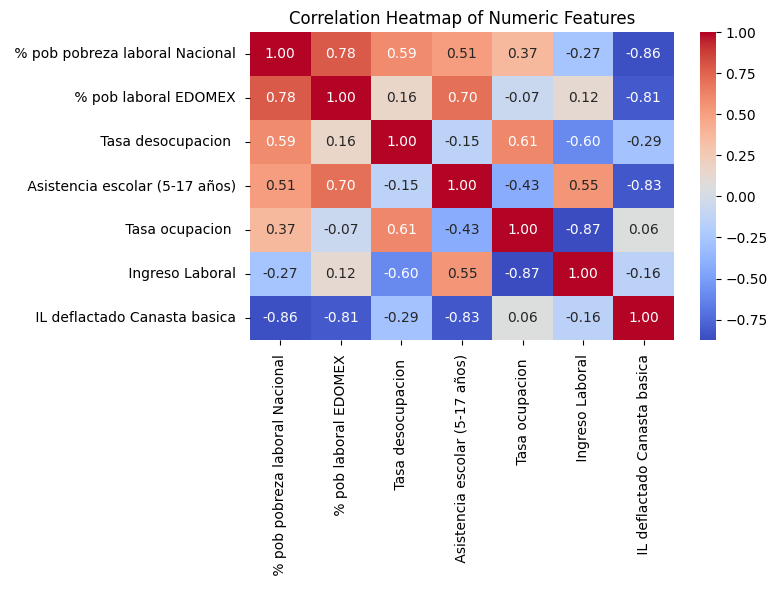

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de distribuciones de características numéricas
pobreza1= pobreza.drop(columns=[' Año  ', ' Trimestre  '])
# Seleccionar columnas numéricas
numeric_cols = pobreza1
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(pobreza1[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Mapa de calor para los valores
numeric_df = numeric_cols
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()


In [7]:
print(pobreza.columns)


Index([' Año  ', ' Trimestre  ', ' % pob pobreza laboral Nacional ',
       ' % pob laboral EDOMEX ', ' Tasa desocupacion  ',
       ' Asistencia escolar (5-17 años) ', ' Tasa ocupacion  ',
       ' Ingreso Laboral ', ' IL deflactado Canasta basica '],
      dtype='object')


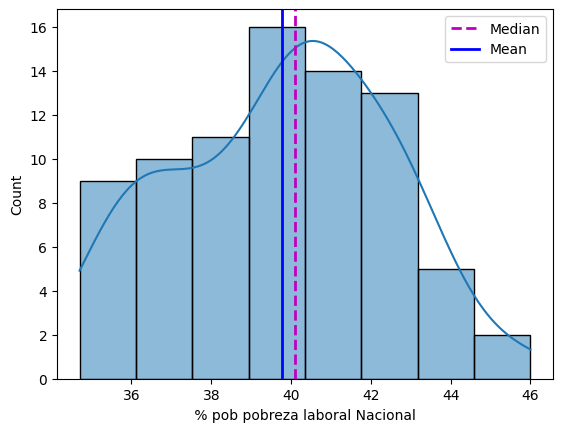

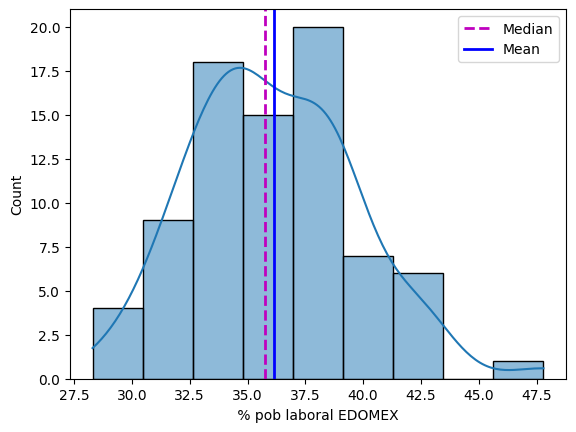

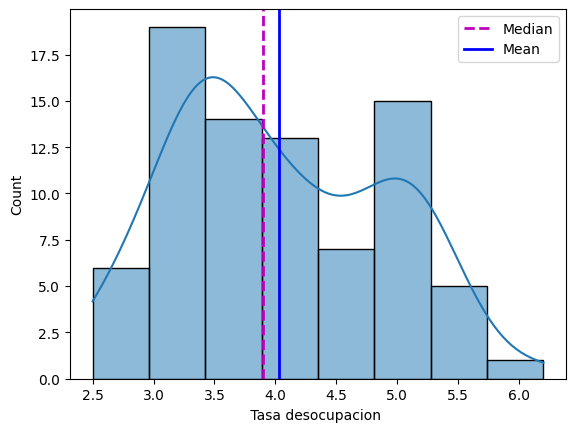

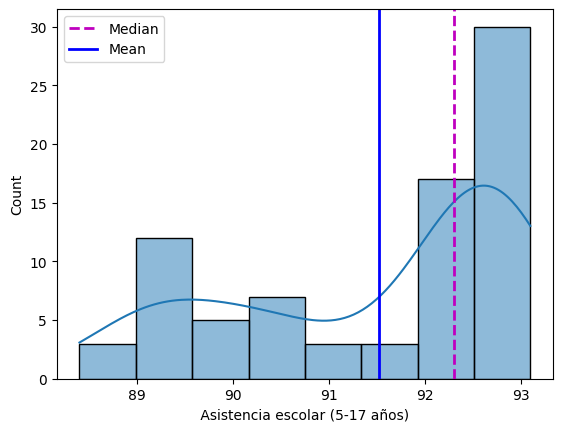

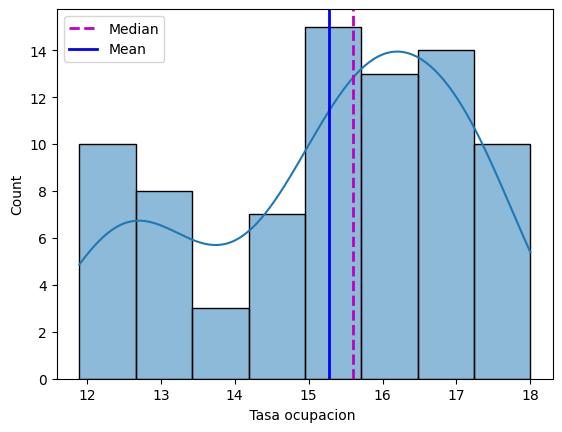

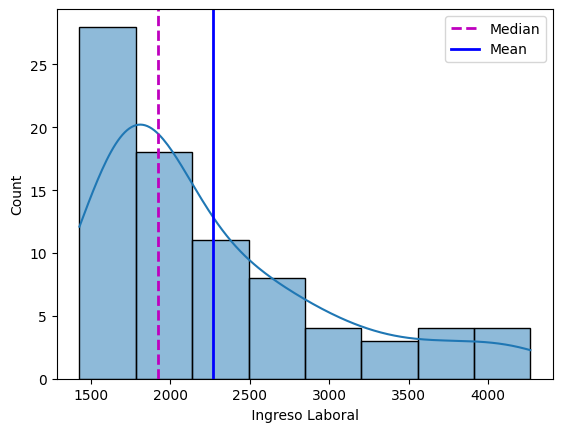

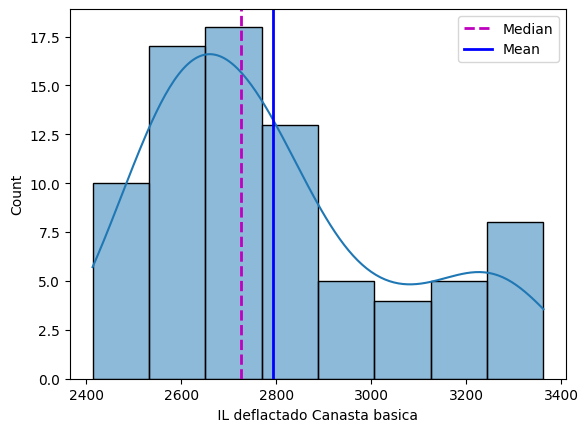

In [8]:
# Calcula la media y la mediana dentro de la distribución
import numpy as np
import seaborn as sns
pobreza1= pobreza.drop(columns=[' Año  ', ' Trimestre  '])
numeric_cols = pobreza1
for col in numeric_cols:
  mean = np.mean(pobreza1[col])
  median = np.median(pobreza1[col])
  fig, ax= plt.subplots()
  sns.histplot(pobreza1[col], kde=True)
  ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
  ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)
  ax.legend()
plt.show()


#mean = np.mean(pobreza[' % pob pobreza laboral Nacional '])
#median = np.median(pobreza[' % pob pobreza laboral Nacional '])
#fig, ax= plt.subplots()
#sns.histplot(pobreza[' % pob pobreza laboral Nacional '], kde=True)
#ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
#ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)
#ax.legend()
#plt.show()

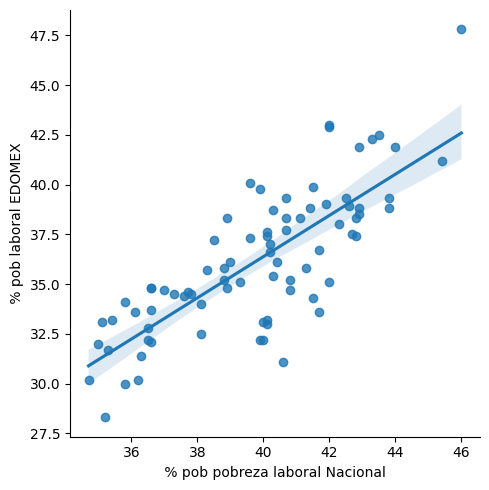

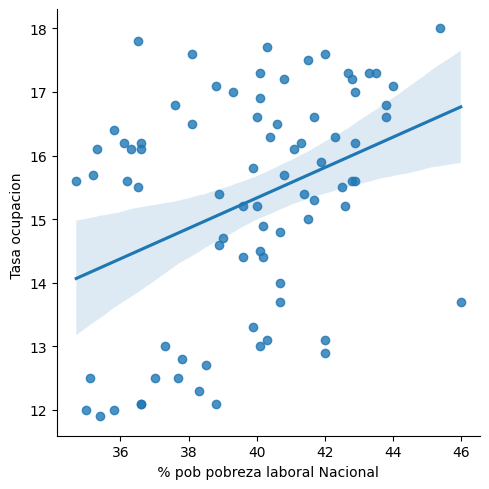

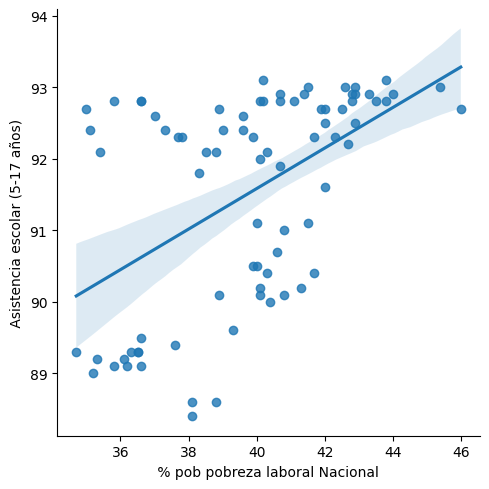

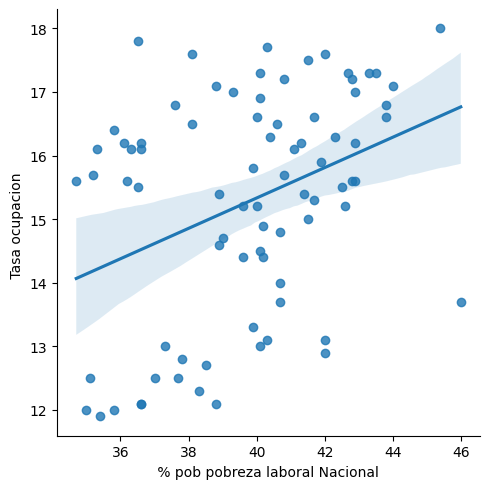

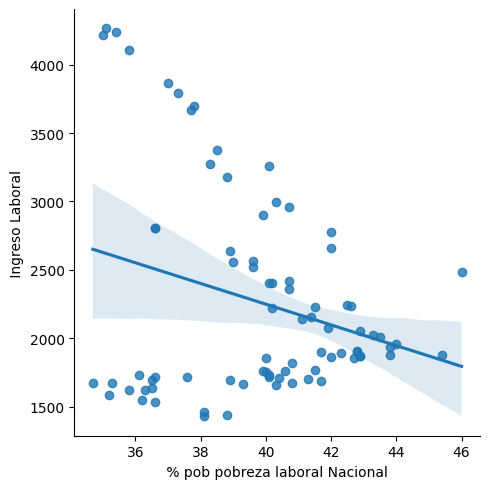

In [9]:
# MOSTRAR LA RELACION ENTRE % DE LA POBLACION EN POBREZA Y EL RESTO DE VARIABLES
sns.lmplot(data=pobreza, x=' % pob pobreza laboral Nacional ', y=' % pob laboral EDOMEX ')
plt.show()
sns.lmplot(data=pobreza, x=' % pob pobreza laboral Nacional ', y=' Tasa ocupacion  ')
plt.show()
sns.lmplot(data=pobreza, x=' % pob pobreza laboral Nacional ', y=' Asistencia escolar (5-17 años) ')
plt.show()
sns.lmplot(data=pobreza, x=' % pob pobreza laboral Nacional ', y=' Tasa ocupacion  ')
plt.show()
sns.lmplot(data=pobreza, x=' % pob pobreza laboral Nacional ', y=' Ingreso Laboral ')
plt.show()

In [10]:
!pip install scikit-learn


In [11]:
import pandas as pd
#TRANSFORMAR COLUMNAS NUMÉRICAS A CATEGÓRICAS
# --- Columnas a transformar ---
columns_to_categorize = [
    ' Tasa desocupacion  ',
       ' Asistencia escolar (5-17 años) ', ' Tasa ocupacion  '
]

# --- Definir los rangos (bins) y las etiquetas (labels) ---
# Los bins deben cubrir todo el rango posible de tus datos.
# El primer valor en 'bins' es el límite inferior del primer rango,
# y el último valor es el límite superior del último rango.
# Generalmente se usan rangos que superen el máximo esperado para evitar errores.
bins = [0, 2.5, 5.0, 7.5, 10.0, float('inf')] # Agregamos float('inf') para capturar valores por encima de 10

# Las etiquetas para cada rango. Debe haber len(bins) - 1 etiquetas.
labels = ["bajo", "medio bajo", "medio alto", "alto", "muy alto"] # Agrega una etiqueta para valores > 10.0

# --- Aplicar la transformación a cada columna ---
for col in columns_to_categorize:
    # Asegurarse de que la columna exista en el DataFrame
    if col in pobreza.columns:
        # Convertir a numérico primero, por si acaso (maneja errores con errors='coerce')
        # Los valores que no puedan convertirse se harán NaN.
        pobreza[col] = pd.to_numeric(pobreza[col], errors='coerce')

        # Manejar posibles NaNs después de la conversión (ej. rellenar con la media o eliminar)
        # Aquí rellenamos con la media, puedes ajustar esta estrategia
        if pobreza[col].isnull().any():
            print(f"Advertencia: La columna '{col}' contiene valores no numéricos o NaN. Rellenando con la media.")
            pobreza[col] = pobreza[col].fillna(pobreza[col].mean())


        # Aplicar pd.cut para categorizar
        # right=True significa que el límite superior del intervalo es inclusivo (ej. (0, 2.5] )
        # Esto coincide con tu descripción: "de 0 a 2.5", "de 2.6 a 5", etc.
        # Ajustamos los bins ligeramente para que los límites sean claros:
        # [0, 2.5], (2.5, 5.0], (5.0, 7.5], (7.5, 10.0]
        # Si quieres que 2.6 sea "medio bajo" y 2.5 sea "bajo", entonces 2.5 debe ser el límite superior del primer bin y 5.0 del segundo.
        # Esto significa que el valor exacto de 2.5 caería en "bajo" y 2.5000001 caería en "medio bajo".
        # Si prefieres 2.6 exacto como el inicio del siguiente bin, pd.cut con right=True es el camino.

        # Nueva propuesta de bins para que los "de 2.6" se adapten bien con right=True:
        # Usamos 2.5 al final del primer bin, 5.0 al final del segundo, etc.
        # Y ajustamos las etiquetas para ser estrictos con los límites.
        # [0.0, 2.5] -> "bajo"
        # (2.5, 5.0] -> "medio bajo"
        # (5.0, 7.5] -> "medio alto"
        # (7.5, 10.0] -> "alto"
        # (10.0, inf) -> "muy alto o error"

        pobreza[f'{col}_categoria'] = pd.cut(pobreza[col],
                                             bins=bins,
                                             labels=labels,
                                             right=True, # El límite superior del bin es inclusivo
                                             include_lowest=True) # Incluir el valor más bajo en el primer bin

        print(f"Columna '{col}' transformada a '{col}_categoria'.")
        print(pobreza[[col, f'{col}_categoria']].head()) # Muestra las primeras filas para verificar
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

# Para verificar los tipos de datos de las nuevas columnas:
print("\nTipos de datos de las columnas originales y nuevas:")
print(pobreza[[col for col in columns_to_categorize] + [f'{col}_categoria' for col in columns_to_categorize]].dtypes)
pobreza.to_csv('pobreza_categorizada.csv', index=False)

Columna ' Tasa desocupacion  ' transformada a ' Tasa desocupacion  _categoria'.
   Tasa desocupacion   Tasa desocupacion  _categoria
0                  3.8                    medio bajo
1                  3.5                    medio bajo
2                  3.8                    medio bajo
3                  3.1                    medio bajo
4                  3.5                    medio bajo
Columna ' Asistencia escolar (5-17 años) ' transformada a ' Asistencia escolar (5-17 años) _categoria'.
   Asistencia escolar (5-17 años)  Asistencia escolar (5-17 años) _categoria
0                             88.4                                  muy alto
1                             88.6                                  muy alto
2                             88.6                                  muy alto
3                             89.1                                  muy alto
4                             89.1                                  muy alto
Columna ' Tasa ocupacion  ' transfor

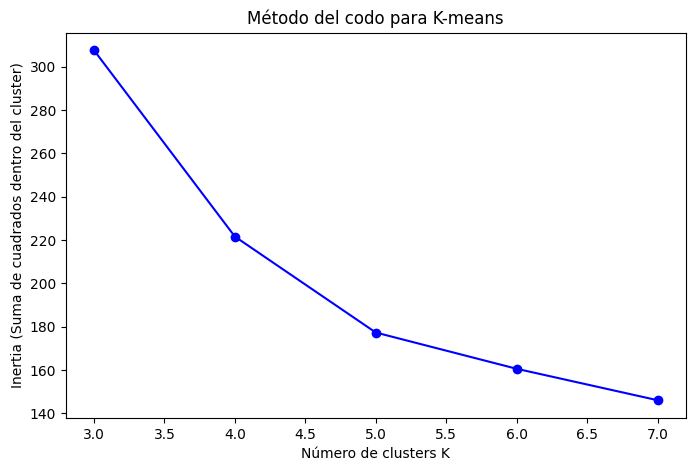

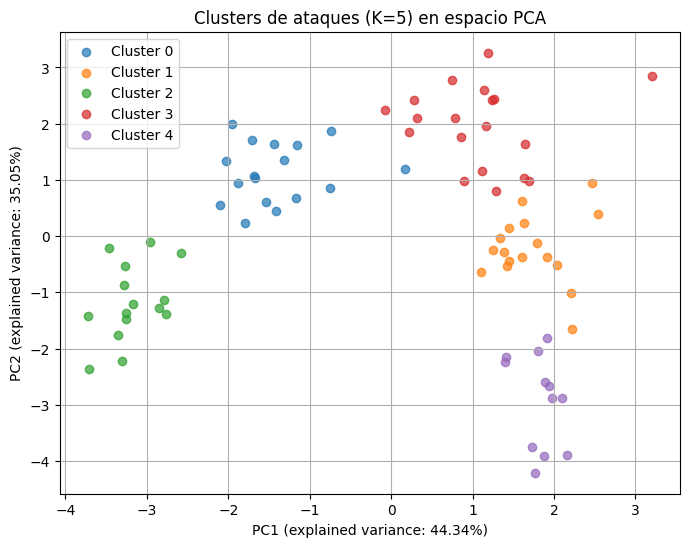

Valores PC2 (primeras 10 filas):
0   -0.531352
1   -0.106871
2   -0.213041
3   -1.359049
4   -1.752210
5   -2.372443
6   -1.424278
7   -1.204709
8   -1.270297
9   -2.228372
Name: PC2, dtype: float64
Índice de Silueta: 0.3376 (más cerca de 1 es mejor)
Índice Davies-Bouldin: 1.0856 (más bajo es mejor)

Variables que más contribuyen a PC1 (por valor absoluto de carga):
Año                                0.471059
Asistencia escolar (5-17 años)     0.468719
IL deflactado Canasta basica       0.378087
Ingreso Laboral                    0.364456
% pob laboral EDOMEX               0.351419
Tasa ocupacion                     0.318737
% pob pobreza laboral Nacional     0.197167
Tasa desocupacion                  0.135926
Trimestre                          0.013735
dtype: float64


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo columnas numéricas para estandarizar
numerical_pobreza = pobreza.select_dtypes(include=np.number)

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_pobreza)

# Método del codo para elegir número óptimo de clusters
inertia = []
K_range = range(3, 8)  # Ajustar el rango
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters K')
plt.ylabel('Inertia (Suma de cuadrados dentro del cluster)')
plt.title('Método del codo para K-means')
plt.show()

# Luego de ver la gráfica del codo, define el número óptimo de clusters
optimal_k = 5 # Cambiar esto según el análisis del codo

# Reducir dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar clusters al dataframe original para análisis (opcional)
pobreza['cluster'] = clusters

# Visualizar clusters en el espacio PCA con leyenda
plt.figure(figsize=(8,6))
for cluster_id in range(optimal_k):
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )
plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title(f'Clusters de ataques (K={optimal_k}) en espacio PCA')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los valores del segundo componente principal (PC2) para las primeras filas
pc2_values = pd.Series(X_pca[:,1], name='PC2')
print("Valores PC2 (primeras 10 filas):")
print(pc2_values.head(10))

# Calcular métricas de validación de clusters
sil_score = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print(f"Índice de Silueta: {sil_score:.4f} (más cerca de 1 es mejor)")
print(f"Índice Davies-Bouldin: {db_score:.4f} (más bajo es mejor)")

# Mostrar qué variables contribuyen más a PC1
pc1_loadings = pd.Series(pca.components_[0], index=numerical_pobreza.columns)
pc1_loadings_sorted = pc1_loadings.abs().sort_values(ascending=False)

print("\nVariables que más contribuyen a PC1 (por valor absoluto de carga):")
print(pc1_loadings_sorted.head(10))  # Top 10 variables


/tmp/ipython-input-20-3803191303.py:35: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



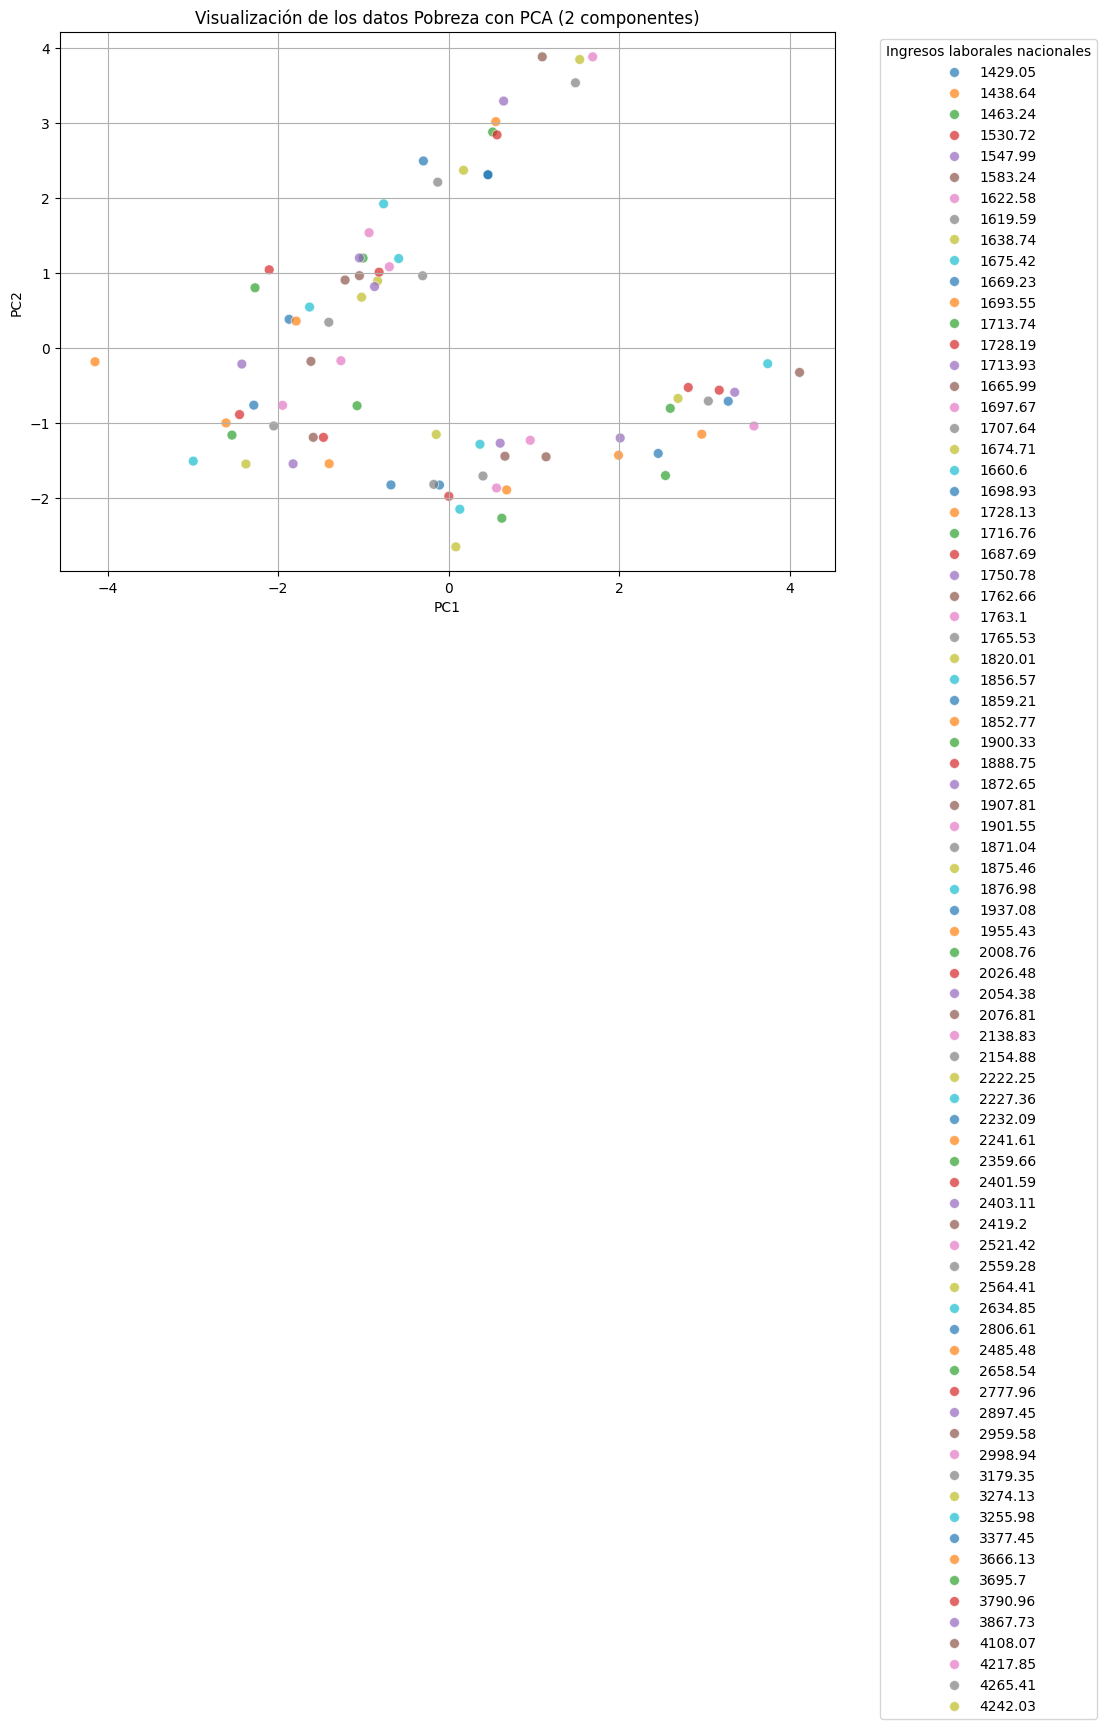

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar y escalar datos

X = pobreza1
y = pobreza1[' Ingreso Laboral ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar PCA con 2 componentes principales
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Aplicar PCA con 2 componentes principales
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Crear DataFrame para graficar
df_pca_2d = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca_2d["pobreza1"] = y.astype(str)

# Visualizar
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_pca_2d, x="PC1", y="PC2",
    hue="pobreza1", palette="tab10", alpha=0.7, s=50
)
plt.title("Visualización de los datos Pobreza con PCA (2 componentes)")
plt.legend(title="Ingresos laborales nacionales", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar y escalar los datos
X = pobreza1
y = pobreza[' Ingreso Laboral ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame para plotly
df_pca3d = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
df_pca3d["pobreza"] = y.astype(str)

# Crear figura interactiva
fig = px.scatter_3d(
    df_pca3d, x="PC1", y="PC2", z="PC3",
    color="pobreza",
    title="Visualización 3D interactiva de PCA (3 componentes)",
    labels={"": ""},
    opacity=0.7
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()


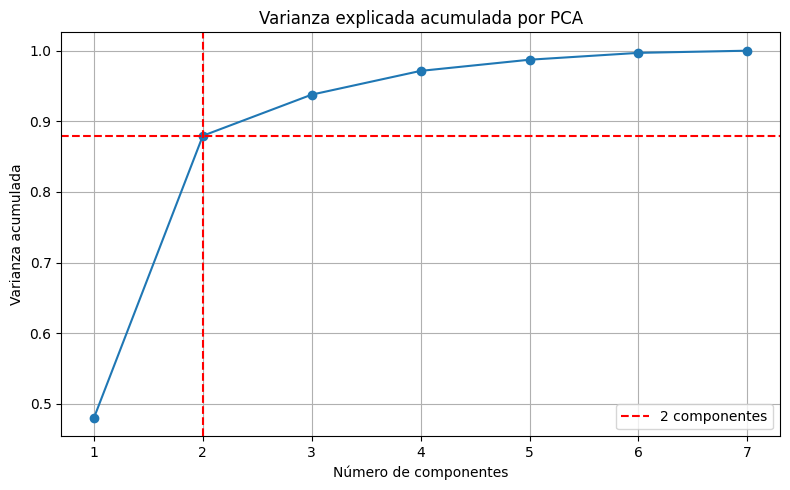

,Componente,Varianza explicada (%),Varianza acumulada (%)
0,PC1,48.00,48.00
1,PC2,39.95,87.95
2,PC3,5.82,93.78
3,PC4,3.36,97.14
4,PC5,1.58,98.72
5,PC6,0.97,99.69
6,PC7,0.31,100.00


In [15]:
# Varianza explicada acumulada
pca_all = PCA().fit(X_scaled)
varianza_acumulada = pca_all.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.axvline(x=2, color='red', linestyle='--', label='2 componentes')
plt.axhline(y=varianza_acumulada[1], color='red', linestyle='--')
plt.title("Varianza explicada acumulada por PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

varianza_individual = pca_all.explained_variance_ratio_
tabla_varianza = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(varianza_individual))],
    "Varianza explicada (%)": (varianza_individual * 100).round(2),
    "Varianza acumulada (%)": (varianza_acumulada * 100).round(2)
})

# Mostrar primeras filas
tabla_varianza.head(10)


Error Cuadrático Medio : 0.3561090133300227
R²: 0.9563547550489014

Coeficientes del modelo:
 % pob laboral EDOMEX : 0.1826981757670814
 Tasa desocupacion  : 0.5461115449011064
 Asistencia escolar (5-17 años) : -0.2634596954275646
 Tasa ocupacion  : 0.4125371803336656
 Ingreso Laboral : -1.9639065206092376e-05
 IL deflactado Canasta basica : -0.00797752476869662
Intersección (Bias): 70.98901524287287


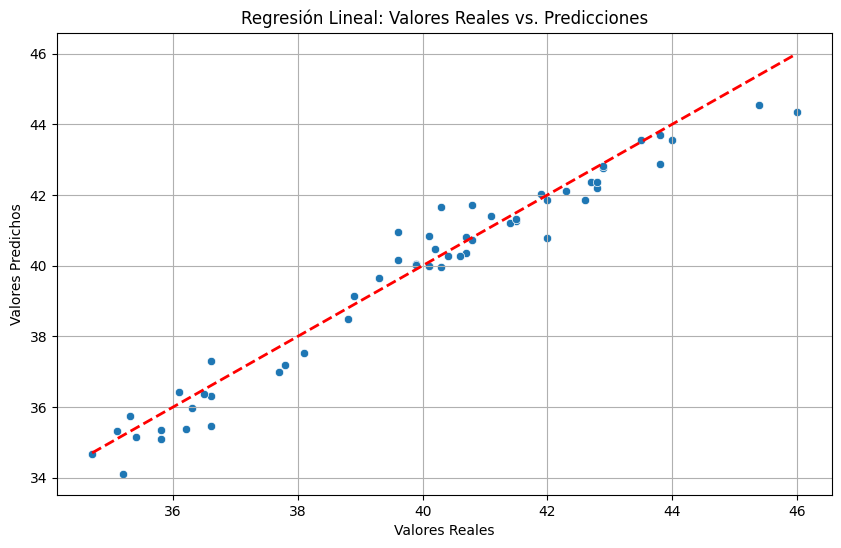

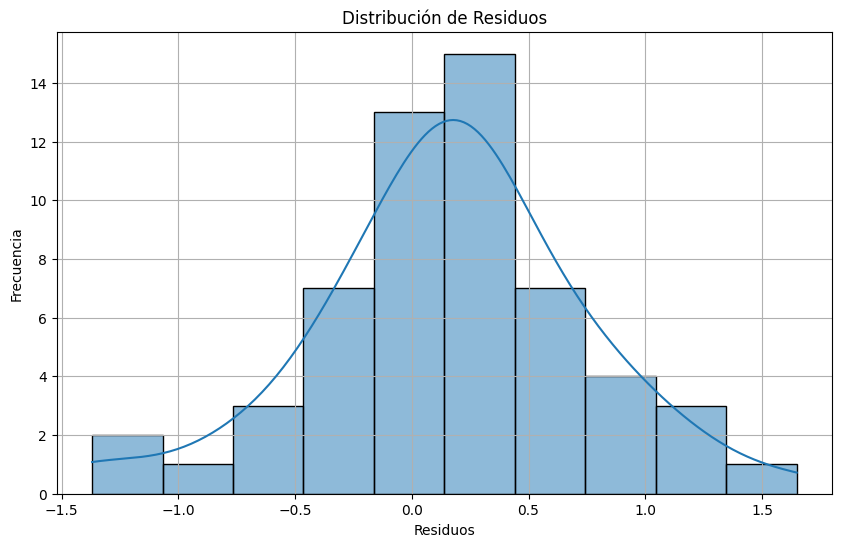

In [16]:
#Regresión lineal
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pobreza
#Definimos a las variables exógenas (x) y endogenas (y) de nuestro modelo
X = df[[' % pob laboral EDOMEX ', ' Tasa desocupacion  ',
       ' Asistencia escolar (5-17 años) ', ' Tasa ocupacion  ',
       ' Ingreso Laboral ', ' IL deflactado Canasta basica ']]
y = df[' % pob pobreza laboral Nacional ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
#Creamos el modelo
model = LinearRegression()
model.fit(X_train, y_train)
#Predicciones
y_pred = model.predict(X_test)
#Evaluando el modelo con R^2 y los errores cuadraticos medios
ecm = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio : {ecm}')
print(f'R²: {r2}')
#Mostrar coef
print('\nCoeficientes del modelo:')
for i, col in enumerate(X.columns):
    print(f'{col}: {model.coef_[i]}')
print(f'Intersección (Bias): {model.intercept_}')
# Graficando
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea ideal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

# Graficando los residuos (errores)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True)
plt.show()
